In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <center> Reducing Restaurant Wait Time: Optimizing Food Expedition with Neural Networks and Data Science <center>

### Table of Contents

**PART 1**

1. [Introduction](#section1)

2. [Project Overview](#section2)

3. [Data Dictionary](#section3)

4. [Data Cleaning](#section4)
   - 4.1 [Anonymizing Data](#section4.1)
   - 4.2 [Dealing with Redundant Columns](#section4.2)
   - 4.3 [Formatting Ratings Appropriately](#section4.3)
   - 4.4 [Formatting Metadata Appropriately](#section4.4)
   - 4.5 [Formatting Dates Appropriately](#section4.5)
   - 4.6 [Dealing with NaN Values](#section4.6)
   
5. [Exploratory Data Analysis](#section5)
   - 5.1 [Distribution of Ratings](#section5.1)
   - 5.2 [Best Rated Restaurants](#section5.2)
   - 5.3 [Worst Rated Restaurants](#section5.3)
   - 5.4 [Number of Reviews by Restaurant](#section5.4)
   - 5.5 [Ratings by Most Influential Reviewers](#section5.5)
   - 5.6 [Ratings by Most Prolific Reviewers](#section5.6)
   - 5.7 [Rating by Time and Month](#section5.7)
   - 5.8 [Ratings by Number of Pictures Included](#section5.8)
   - 5.9 [Review Content Word Cloud](#section5.9)

6. [Preprocessing Text Data](#section6)

7. [Modelling and Insights](#section7)

**PART 2**

8. [Image Data EDA](#section8)
9. [Building and Optimizing Models](#section9)

**PART 3**

10. [Building Automated Expeditor](#section10)

---

<a id='section1'></a>
# <center> 1. Introduction <center>
    
## Problem Statement

In a busy restaurant it’s common for the most senior member of the kitchen team to stand on the restaurant side of the pass-through to collate dishes from the chefs in order to build complete bills for servers and runners. This is known as performing the role of expediter.

The primary role of an expediter (or "expo") is to ensure that all dishes on an order are prepared and presented correctly before they are served to the customers. The expediter plays a crucial role in maintaining efficiency and quality in the restaurant's operations. This position is particularly important in busy and high-volume establishments where the coordination of orders and the synchronization of kitchen and service activities are critical for a successful dining experience.

While technology has significantly optimized various aspects of the hospitality industry, the task of compiling bills remains largely manual. On average, it takes around 30 seconds to build a bill for a single table in a busy restaurant. If a restaurant was to serve 400 groups of guests in a day, a total of 200 minutes would be dedicated solely to coordinating which dishes should be delivered to specific tables. This manual effort, amid the fast-paced nature of the industry, has the potential to detrimentally impact guests, with speed of service playing such a crucial role in the dining experience. The juxtaposition of technological advancement in various areas of hospitality against this persistently manual task underscores an opportunity for further streamlining in the industry's operational landscape.

### The Big Idea:  

A potential streamlining of this operational landscape could be achieved through a solution composed of two main parts. Firstly, the adoption of technology, including cameras and positional lighting, in an area of the kitchen that has seen minimal change since its introduction, the pass-through. This modernization aims to enhance the efficiency of the bill-building process. Secondly, the implementation of image recognition through a Convolutional Neural Network in order to automate and expedite the identification and compilation of dishes for each table. This integration of advanced technology not only addresses the longstanding manual aspects of bill preparation but also aligns with the broader trend of leveraging innovation to optimize processes within the hospitality industry.

These two elements combine to revolutionize the process of passing dishes from the kitchen team to the Front of House. A strategically positioned camera, discreetly mounted underneath the pass-through, captures video footage of each dish as it is handed over. This footage is swiftly transmitted to a cloud storage service and instantly extracted for augmentation. After pre-processing, the data is fed into a Convolutional Neural Network, which rapidly predicts the identity of each dish. These predictions are cross-referenced with the digital ordering information, ensuring that all dishes currently on order are recognized.

Once every dish is identified, accounted for, and the bill is complete, the positional lighting system signals servers about the order of delivery for maximum efficiency. Despite the intricate nature of this process, the entire cycle could take less than a second, which makes the average 30-second bill-building time of a human expediter seem like an eternity in comparison. This innovative integration of technology not only streamlines operations but also marks a significant advancement, showcasing the efficiency and precision achievable through automation in the hospitality industry.



### Datasets Used

The work for this project is built on two publicly available datasets.
    - The first of which is a dataset containing 10,000 reviews of restaurants, this data will be used to determine the legitimacy of the problem space proposed. An in depth analysis of the contents of the reviews will be undertaken to establish how extended wait time negatively affects the experience of a restaurant guest, this will be quantified using advanced statistical analysis.
    - The second dataset is made up of a collection of images of food items. There are 101 different dishes within the dataset, each with around 1000 images. This dataset will be used to train our CNN model to accurately recognise the different food items. It is worth noting that the model training data for the commercially packaged product offered to the restaurant industry will be propriatary and restaurant specific.
    
<a id='section2'></a>

---

### 2. Project Overview

Our project is divided into 3 parts.

##### Part 1: Preliminary Research - Data Cleaning, Exploratory Data Analysis, and Text Analysis

Before we embark on this project it is important to validate the assumptions that the need for this work is built upon, this is where the value of the project will become clear. In order to achieve this, we will analyse a dataset of restaurant reviews. If there are a large portion of negative reviews that mention the wait time as a contributing factor to a guests experience then our assumption of this as a pain point will be confirmed and work can begin. This will include thorough data cleaning to ensure the data is reliable and consistent. We will then dive into Exploratory Data Analysis (EDA) to uncover meaningful insights and patterns within the data. This essential groundwork lays the foundation for subsequent stages.


##### Part 2: Building and Optimizing Model

In the second leg of our project, we construct our initial model, making use of transfer learning and the InceptionResNetV2 architecture. We will compile a classification head for our model specific to the problem at hand. We will also fine tune in order to enhance model performance. This phase is pivotal in achieving our project's objectives and delivering valuable insights.


##### Part 3: Building Automated Expediter Script

Now that we have a model that can accurately predict a food item based on a visual input, we need to consider a way to productionize this into a applicable workflow. The first iteration of this will be a piece of Pyhthon code that randomly selects dishes from the test images, assigns them to a table and then makes predictions. I hope that later versions will make use of the Python computer vision library OpenCV to make real time predictions from live video feed.

---

As our first step, we will import the necessary libraries and packages.

In [113]:
# Importing necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
import random
import cv2
import re
import os
import PIL.Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics.pairwise import cosine_similarity
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
from collections import Counter

nltk.download('stopwords')

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from random import sample

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Mounting to the drive where the image data is stored

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [133]:
# Reading the data from the source csv file and writing it into a dataframe

df = pd.read_csv('/content/drive/MyDrive/Restaurant reviews.csv')

Let's have our first look into our dataset:

In [134]:
# First look at the loaded dataset

df.head(3)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   

  Rating                 Metadata             Time  Pictures    7514  
0      5   1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1      5  3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN  
2      5  2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN

---

<a id='section3'></a>

# <center> 3. Data Dictionary



| Feature             | Description                                                           |
|:--------------------|:----------------------------------------------------------------------|
| Restaurant          | Name of the establishment featured in the review.                     |
| Reviewer            | The name of the guest who left the review.                            |
| Review              | The content of the review.                                            |
| Rating              | A score given for the dining experience (1, Very Poor : 5, Excellent).|
| Metadata            | Additional information on the reviewer.                               |
| Time                | Publication datetime of the review.                                   |      
| Pictures            | Number of photographs included in the review.                         |
| 7514                | UNKNOWN.                                                              |

In [135]:
# Taking a quick look at the data types stored in our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


Most of our data is in string format with the exception of our last two columns. We can see a number of missing values in a few columns too but we will deal with those later.

---
<a id='section4'></a>

## 4. Data Cleaning
<a id='section4.1'></a>

In this section we will prepare our data for EDA by converting datatypes, dealing with data redundancy and addressing any NaN values in the dataset.

##### 4.1 Anonymizing Data
The first step will to be to clean our review data before beginning EDA this may involve dropping entire columns that contain information that isn't relevent to the problem. As well as processing columns to make plotting and visualisation easier.

The first step is to anonymize our reviewer names for data ethicacy and privacy reasons.

In [136]:
# First we will check the number of unique entries in the Reviewer column
df['Reviewer'].nunique()

7446

It looks like we have 7446 different reviewers in our dataset. A simple way to anonymize these reviewers is to use a for loop to map a numeric identifier to each unique name in our dataset. Since we have less than 10,000 individuals, we can get away with a 4 digit numeric identifier. Grouping Reviewers by name in this fashion is not a perfect solution since there may be instances of multiple users with the same name within the dataset. For the purpose of our text analysis this isn't too much of a concern.

In [137]:
# Initialize an empty dictionary to store the mapping of names to 4-digit numbers

name_to_number_mapping = {}

# Generate a list of all possible 4-digit numbers in random order

all_numbers = [str(i).zfill(4) for i in range(10000)]
random.shuffle(all_numbers)

# Loop through each unique name in the 'Reviewer' column
for unique_name in df['Reviewer'].unique():
    # Skip NaN values
    if pd.notna(unique_name) and unique_name.strip() != '':
        # Check if the name is not already in the dictionary
        if unique_name not in name_to_number_mapping:
            # Pop the first number from the shuffled list
            four_digit_number = all_numbers.pop(0)
            # Map the name to the generated number
            name_to_number_mapping[unique_name] = four_digit_number
        else:
            # Print duplicate names for debugging
            print(f"Duplicate name found: {unique_name}")

We know that the number of unique names in the dataset is 7446, we can write a simple line of code to produce a True boolean if this value matches the length of the name_to_number_mapping variable.

In [138]:
# Ensuring the length of our dictionary is the same as the length of our number of unique names in our dataset.

are_lengths_equal = df['Reviewer'].nunique() == len(name_to_number_mapping)
print(f"Are the lengths equal? {are_lengths_equal}")

Are the lengths equal? True


In [139]:
# Mapping the random numeric identifiers to individual names in string form.

df['Reviewer'] = df['Reviewer'].map(name_to_number_mapping).astype(str)

In [140]:
# Sanity check

df.head()

Restaurant Reviewer  \
0  Beyond Flavours     5833   
1  Beyond Flavours     5723   
2  Beyond Flavours     2508   
3  Beyond Flavours     7001   
4  Beyond Flavours     1842   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   
3                                                                              Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.   
4                                                                  Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.   

  Rating                 Metadata             Time  Pictures    7514  
0      5   1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1      5  3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN  
2      5  2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN  
3      5    1 Review , 1 Follower  5/24/2019 22:11         0     NaN  
4      5  3 Reviews , 2 Followers  5/24/2019 21:37         0     NaN

In [141]:
# Checking value counts for our numeric identifiers.

df['Reviewer'].value_counts()

nan     38
3823    13
3433    13
1456    12
5630    11
        ..
4633     1
6195     1
3612     1
2565     1
4023     1
Name: Reviewer, Length: 7447, dtype: int64

Let's take a look at the rows that have missing reviewer information, this will inform how we deal with our missing data.

In [142]:
# Filtering out the records with 'nan' in the Reviewer column.

missing = df[df['Reviewer'] == 'nan']

In [143]:
# Checking against the value count from earlier.

len(missing)

38

In [144]:
# Peeking at the dataframe populated with records with instances of 'nan' in the Reviewer column.

missing

Restaurant Reviewer Review Rating Metadata Time  Pictures  7514
8777  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8778  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8779  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8780  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8781  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8782  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8783  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8784  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8785  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8786  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8787  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8788  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8789  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8790  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8791  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8792  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8793  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8794  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8795  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8796  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8797  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8798  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
8799  American Wild Wings      nan    NaN    NaN      NaN  NaN         0   NaN
9085         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9086         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9087         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9088         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9089         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9090         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9091         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9092         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9093         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9094         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9095         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9096         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9097         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9098         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN
9099         Arena Eleven      nan    NaN    NaN      NaN  NaN         0   NaN

We can see that there is NO information other than the restaurant name for the reviewers with no recorded name. We will be dropping these rows from our dataset.

In [145]:
# Checking shape of the original dataset.

df.shape

(10000, 8)

In [146]:
# Dropping the filtered section from the original dataset to remove the 38 records.

df.drop(df[df['Reviewer'] == 'nan'].index, inplace=True)

In [147]:
# Sanity check of the now reduced dataset.

df.shape

(9962, 8)

In [148]:
# Further sanity check using the same filtering as before.

df[df['Reviewer'] == 'nan']

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures, 7514]
Index: []

In [149]:
# Checking the value counts of our anonymized Reviewers.

df['Reviewer'].value_counts()

3433    13
3823    13
1456    12
8017    11
5630    11
        ..
4633     1
6195     1
3612     1
2565     1
4023     1
Name: Reviewer, Length: 7446, dtype: int64

In [150]:
df.head()

Restaurant Reviewer  \
0  Beyond Flavours     5833   
1  Beyond Flavours     5723   
2  Beyond Flavours     2508   
3  Beyond Flavours     7001   
4  Beyond Flavours     1842   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   
3                                                                              Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.   
4                                                                  Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.   

  Rating                 Metadata             Time  Pictures    7514  
0      5   1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1      5  3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN  
2      5  2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN  
3      5    1 Review , 1 Follower  5/24/2019 22:11         0     NaN  
4      5  3 Reviews , 2 Followers  5/24/2019 21:37         0     NaN

We have successfully anonymized our data. Now we can move on to addressing other issues in the dataset, like data redundancy and improper formatting.

---
<a id='section4.2'></a>

##### 4.2 Dealing with Redundant Columns

First let's check for duplicated rows in our dataframe.

In [151]:
# Checking for duplicated rows.

print(f'There are {df.duplicated().sum()} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


We don't seem to have any duplicates in our Kaggle data, excellent!

In [152]:
# Taking another look at our dataset info.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9962 non-null   object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    9962 non-null   int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 700.5+ KB


We can see clearly that the column labelled '7514' is storing float data types but it seems to only contain a single record.

In [153]:
# We have one value in the whole column, this is not going to help us in any way.

print(f"There are a total of {df['7514'].notnull().sum()} rows containing data in the '7514' column.")
print(f"The percentage of missing information from the '7514' column is: {df['7514'].isna().sum() / len(df['7514']) * 100}%")

There are a total of 1 rows containing data in the '7514' column.
The percentage of missing information from the '7514' column is: 99.98996185504919%


We can get rid of this column since it doesn't hold any real information.

In [154]:
# Dropping the column

df.drop('7514', axis=1, inplace=True)

In [155]:
# Sanity check
df.head(5)

Restaurant Reviewer  \
0  Beyond Flavours     5833   
1  Beyond Flavours     5723   
2  Beyond Flavours     2508   
3  Beyond Flavours     7001   
4  Beyond Flavours     1842   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   
3                                                                              Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.   
4                                                                  Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.   

  Rating                 Metadata             Time  Pictures  
0      5   1 Review , 2 Followers  5/25/2019 15:54         0  
1      5  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2      5  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3      5    1 Review , 1 Follower  5/24/2019 22:11         0  
4      5  3 Reviews , 2 Followers  5/24/2019 21:37         0

We have successfully dropped the redundant column, now we can move on to the next step.

---
<a id='section4.3'></a>

##### 4.3 Formatting Ratings Appropriately

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9962 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9962 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.6+ KB


Having visually inspected the dataset we know that the column 'Rating' is a numeric score for a restaurant experience attached to the content of a review. We would expect to see this information stored as an integer, it seems that the information is actually being stored in string form. This can be easily fixed. First we need to make sure we're dealing with whole numbers.

In [157]:
# Checking values to determine we only have whole numbers

df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

It seems like we have a number of floats in our column which will need rounding. There is also a record with a string value in the `Rating` column, we can take a closer look at the data to determine what a Rating of "Like" really means!

In [158]:
# Filtering the novel instance into its own little dataframe.

LIKE = df[df['Rating'] == 'Like']

In [159]:
# Taking a look at the full review.

pd.set_option('display.max_colwidth', None)
LIKE['Review']

7601    One of the best pizzas to try. It served with the fresh crust and the topping of veggies are fresh and the taste of the ingredients was awesome and it is fully overloaded with Cheese. I would like to recommend to try every Time I wager for pizza
Name: Review, dtype: object

This is clearly a very positive review and as such I think we can change the rating for this review from a 'Like' to a 5.

In [160]:
# Replacing the instance of 'Like' with a number 5 as a string, like the rest of the values.

df['Rating'] = df['Rating'].replace('Like', '5')

In [161]:
# Sanity check

df['Rating'].value_counts()

5      3833
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [162]:
# We can inspect our data type before rounding since we will convert to the Int64 data type in the same step.

print(df['Rating'].dtype)

object


In [163]:
# Convert the 'Rating' column to numeric values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Round the numeric values to the nearest whole number
df['Rating'] = df['Rating'].round()

# Convert the 'Rating' column to integers
df['Rating'] = df['Rating'].astype('Int64')

In [164]:
# Checking value counts once more

df['Rating'].value_counts()

5    3833
4    2489
1    1735
3    1193
2     712
Name: Rating, dtype: Int64

In [165]:
# Sanity check

print(df['Rating'].dtype)

Int64


We now have anonymous data, we have successfully dropped a column storing information that doesn't teach us anything useful, and now our `Rating` column is storing whole numbers as integers.

---
<a id='section4.4'></a>

##### 4.4 Formatting Metadata Appropriately

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9962 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   Int64 
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9962 non-null   int64 
dtypes: Int64(1), int64(1), object(5)
memory usage: 632.4+ KB


Our `Metadata` column is also storing string data, lets take a closer look at the data to learn more about the information stored.

In [167]:
# Pulling a random sample of Metadata information including Reviewer labels.

print(df[['Reviewer','Metadata']].sample(10))

     Reviewer                   Metadata
8888     6106                  3 Reviews
2376     0614                  0 Reviews
5033     8818                   1 Review
4543     0601     4 Reviews , 1 Follower
6491     9730      1 Review , 1 Follower
490      7732      1 Review , 1 Follower
9367     3400   7 Reviews , 58 Followers
7365     2309  28 Reviews , 69 Followers
6119     4132    9 Reviews , 3 Followers
6018     1902    3 Reviews , 6 Followers


It looks like the Metadata column stores a number followed by a word displaying the number of reviews which is followed by another number and by another word displaying the number of followers. There is a comma separating these two pieces of information, we should be able to make use of regular expression to split this information into two disticnt columns.

In [168]:
# Split the 'Metadata' column and create two new columns.

df[['num_of_reviews', 'num_of_followers']] = df['Metadata'].str.split(',', expand=True)

In [169]:
# Sanity check.

df.head()

Restaurant Reviewer  \
0  Beyond Flavours     5833   
1  Beyond Flavours     5723   
2  Beyond Flavours     2508   
3  Beyond Flavours     7001   
4  Beyond Flavours     1842   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   
3                                                                              Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.   
4                                                                  Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.   

   Rating                 Metadata             Time  Pictures num_of_reviews  \
0       5   1 Review , 2 Followers  5/25/2019 15:54         0      1 Review    
1       5  3 Reviews , 2 Followers  5/25/2019 14:20         0     3 Reviews    
2       5  2 Reviews , 3 Followers  5/24/2019 22:54         0     2 Reviews    
3       5    1 Review , 1 Follower  5/24/2019 22:11         0      1 Review    
4       5  3 Reviews , 2 Followers  5/24/2019 21:37         0     3 Reviews    

  num_of_followers  
0      2 Followers  
1      2 Followers  
2      3 Followers  
3       1 Follower  
4      2 Followers

In [170]:
# Extracting the numeric elements from the values stored in our new columns from the expanded Metadata information.

df['num_of_reviews'] = df['num_of_reviews'].astype(str).str.extract('(\d+)').astype(float).fillna(0).astype(int)
df['num_of_followers'] = df['num_of_followers'].astype(str).str.extract('(\d+)').astype(float).fillna(0).astype(int)

In [171]:
# Sanity check to ensure we have successfully created Int64 data for our review/followe count columns.

print(f"The datatype for our num_of_reviews column is: {df['num_of_reviews'].dtype}")
print(f"The datatype for our num_of_followers column is: {df['num_of_followers'].dtype}")

The datatype for our num_of_reviews column is: int64
The datatype for our num_of_followers column is: int64


In [172]:
# Pulling a random sample of our new columns to check against Metadata to examine for edge cases like Reviewer '4494'

print(df[['Reviewer','Metadata', 'num_of_reviews', 'num_of_followers']].sample(10))

     Reviewer                     Metadata  num_of_reviews  num_of_followers
5135     9692        1 Review , 1 Follower               1                 1
9722     1387     4 Reviews , 60 Followers               4                60
8193     1888      2 Reviews , 6 Followers               2                 6
1565     1946                    2 Reviews               2                 0
9663     3009  74 Reviews , 1738 Followers              74              1738
9570     8435   91 Reviews , 114 Followers              91               114
2546     2368      6 Reviews , 9 Followers               6                 9
2891     5979        1 Review , 1 Follower               1                 1
3866     4762      1 Review , 51 Followers               1                51
6118     4119      1 Review , 32 Followers               1                32


We can drop the Metadata column now and complete the final few steps of data cleaning before starting our EDA.

In [173]:
# Dropping the Metadata column since we no longer need this information

df.drop('Metadata', axis =1, inplace=True)

---
<a id='section4.5'></a>

##### 4.5 Formatting Dates Appropriately

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Restaurant        9962 non-null   object
 1   Reviewer          9962 non-null   object
 2   Review            9955 non-null   object
 3   Rating            9962 non-null   Int64 
 4   Time              9962 non-null   object
 5   Pictures          9962 non-null   int64 
 6   num_of_reviews    9962 non-null   int64 
 7   num_of_followers  9962 non-null   int64 
dtypes: Int64(1), int64(3), object(4)
memory usage: 710.2+ KB


Our `Time` column is string data too, let's do some investigating.

In [175]:
# Exploring some of the examples of records from our Time column.

df['Time'].sample(5)

4980    10/16/2018 23:20
6065       3/5/2019 5:05
5410     4/12/2019 15:55
1596     7/23/2018 18:07
4037      2/6/2019 23:44
Name: Time, dtype: object

We have date information and time information, let's convert this into the datetime datatype.

In [176]:
# Converting to datetime

df['Time'] = pd.to_datetime(df['Time'])

In [177]:
# Sanity check

df['Time'].sample(5)

7651   2018-09-27 21:34:00
1591   2018-07-25 18:08:00
5690   2018-12-14 11:50:00
1265   2019-03-22 13:47:00
4692   2018-10-12 19:38:00
Name: Time, dtype: datetime64[ns]

Storing the date and time information in this way will allow us to visualize more easily later on.

---
<a id='section4.6'></a>

##### 4.6 Dealing with NaN Values Appropriately

The last step of our data cleaning stage is to deal with any NaN values that may be in our data.

In [178]:
# Checking missing values for the dataset on a column level.

df.isna().sum()

Restaurant          0
Reviewer            0
Review              7
Rating              0
Time                0
Pictures            0
num_of_reviews      0
num_of_followers    0
dtype: int64

In [179]:
# Checking missing information.

print(f"The total number of NaN values in our dataframe is: {df.isna().sum().sum()}")
print(f"The percentage of missing information from the 'Review' column is: {df['Review'].isna().sum() / len(df['Review']) * 100}%")
print(f"The number of total rows in our dataframe is: {len(df)}")

The total number of NaN values in our dataframe is: 7
The percentage of missing information from the 'Review' column is: 0.07026701465569163%
The number of total rows in our dataframe is: 9962


We can see that the only column with missing information is the `Review` column. We will likely have to drop these rows.

In [180]:
# Taking a look at the records where there are NaN values recorded in the 'Review' column.

df[df.isna().any(axis=1)]

Restaurant Reviewer Review  Rating                Time  \
2360                Amul     3507    NaN       5 2018-07-29 18:00:00   
5799        Being Hungry     4924    NaN       5 2018-07-19 23:55:00   
6449     Hyderabad Chefs     7486    NaN       5 2018-07-23 16:29:00   
6489     Hyderabad Chefs     9448    NaN       5 2018-07-08 21:19:00   
7954        Olive Garden     5814    NaN       3 2018-08-09 23:25:00   
8228  Al Saba Restaurant     3324    NaN       5 2018-07-20 22:42:00   
8844      Domino's Pizza     1495    NaN       5 2018-08-09 21:41:00   

      Pictures  num_of_reviews  num_of_followers  
2360         0               0                 0  
5799         0               4                 4  
6449         0               1                 0  
6489         0               1                 0  
7954         0               1                 1  
8228         0               1                 0  
8844         0               2                 2

We will be dropping these rows because the information stored in the 'Review' column is what will indicate to us what is driving good/bad reviews. Without this information we can't make any inference.
Also whoever is rating a Domino's Pizza as a 5 is not to be trusted.

In [181]:
# Dropping the rows that contain the missing values.

df.dropna(subset=['Review'], inplace=True)

In [182]:
# Sanity checks

print(f"The total number of NaN values in our dataframe is: {df.isna().sum().sum()}")
print(f"The percentage of missing information from the 'Review' column is: {df['Review'].isna().sum() / len(df['Review']) * 100}%")
print(f"The number of total rows in our dataframe is: {len(df)}")

The total number of NaN values in our dataframe is: 0
The percentage of missing information from the 'Review' column is: 0.0%
The number of total rows in our dataframe is: 9955


The steps we have completed in our data cleaning section are :

- Anonymizing our data.
- Dropping redundant information.
- Formatting our data in appropriate ways.
- Removing any records with missing values.

Now we can begin to explore the data with some visualisations.

---
<a id='section5'></a>

## 5. Exploratory Data Analysis

In this section we will create some visualisations to gain insights into some of the trends in our data to better shine a light on what exactly contributes to a negative/positive restaurant experience.

In [183]:
df.head()

Restaurant Reviewer  \
0  Beyond Flavours     5833   
1  Beyond Flavours     5723   
2  Beyond Flavours     2508   
3  Beyond Flavours     7001   
4  Beyond Flavours     1842   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   
3                                                                              Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.   
4                                                                  Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.   

   Rating                Time  Pictures  num_of_reviews  num_of_followers  
0       5 2019-05-25 15:54:00         0               1                 2  
1       5 2019-05-25 14:20:00         0               3                 2  
2       5 2019-05-24 22:54:00         0               2                 3  
3       5 2019-05-24 22:11:00         0               1                 1  
4       5 2019-05-24 21:37:00         0               3                 2

Things we may want to consider :-
   -  Restaurants with the top ratings (with global avg line)
   -  Restaurants with the lowest ratings (with global avg line)
   -  Most reviewed restaurants
   -  Reviewers with greatest num_of_reviews plus the avg rating they give (boxplot?)
   -  Reviewers with greatest num_of_followers plus the avg rating they give (boxplot?)
   -  Relationship between rating and time
   -  Relationship between rating and date
   -  Relationship between number of pictures and rating

    


---
   <a id='section5.1'></a>

##### 5.1 Distribution of Ratings


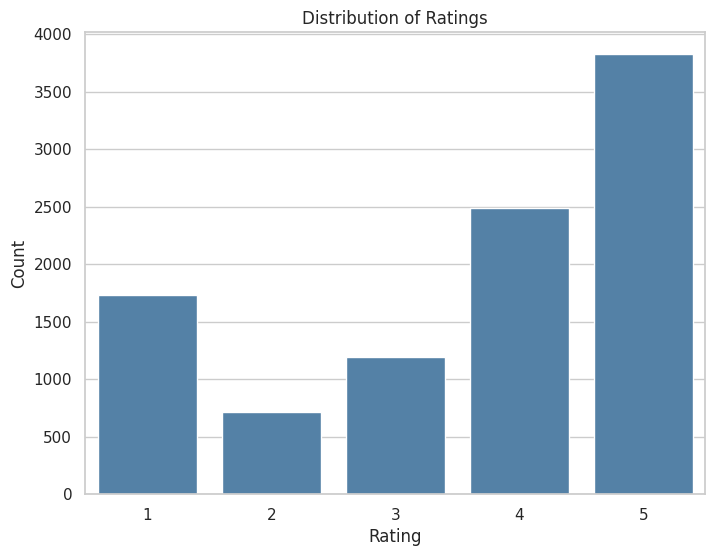

In [184]:
# Building a bar chart of Ratings distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, color='steelblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The plot above clearly shows that the most frquent rating given for a restaurant is '5', with the second most frequent rating in our dataset being '4'. If our restaurants were selected at random and there was no bias in the data collection, it would appear that people are most likely to leave a review if they have had a positive expereince. That being said, the reviews with ratings of '1' are much more frequent than those with ratings of '2' and '3'. This would seem to suggest that people are most likely to leave a review sharing a negative experience than an average experience.

---
<a id='section5.2'></a>

##### 5.2 Best Rated Restaurants


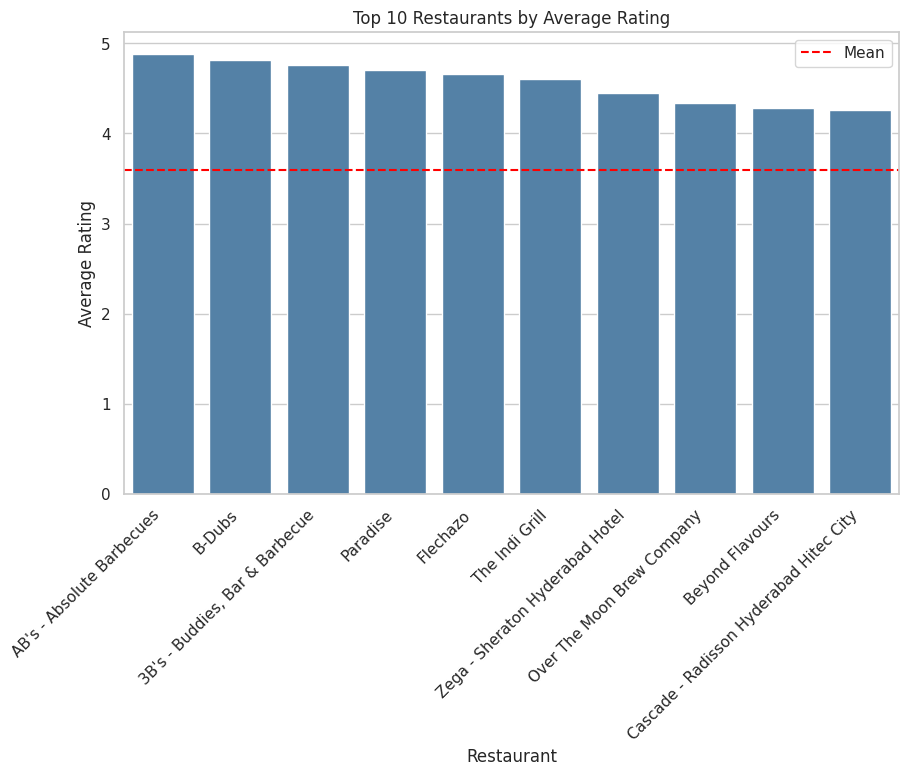

In [185]:
# Grouping by Restaurant and sorting by Rating
grouped_data = df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).head(10)

# Set seaborn style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, color='steelblue')
plt.axhline(y=df['Rating'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.title('Top 10 Restaurants by Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with label 'Mean'
plt.show()

The plot above shows our dataset's Top 10 restaurants by Rating with the top rated restaurant being 'AB's - Absolute Barbecues' with a rating of around 4.8, this is around 1.2 points above the global average of 3.6. Wherever this data is collected from, we have some big barbecue fans!


---
<a id='section5.3'></a>

##### 5.3 Worst Rated Restaurants
<a id='section5.3'></a>

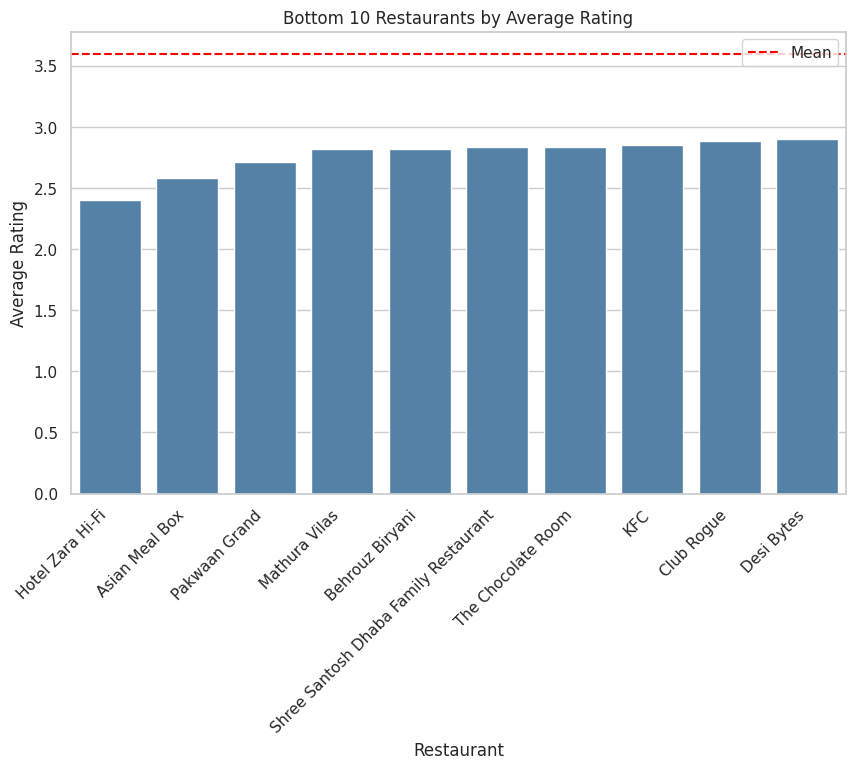

In [186]:
# Grouping by Restaurant and sorting by Rating
grouped_data = df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=True).head(10)

# Set seaborn style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, color='steelblue')
plt.axhline(y=df['Rating'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.title('Bottom 10 Restaurants by Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with label 'Mean'
plt.show()

The plot above shows our dataset's Bottom 10 restaurants by Rating with the worst rated restaurant being 'Hotel Zara Hi-Fi' with a rating of around 2.4, this is around 1.2 points below the global average of 3.6.

---
<a id='section5.4'></a>

##### 5.4 Number of Reviews by Restaurant

What about the number of reviews each restaurant has recieved.

In [187]:
# Checking value counts of our Restaurants, since each row is a new review this is the number of reviews for each establishment.

df['Restaurant'].value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

It looks like we have 100 different restaurants in our dataset. Given that we have 100 restaurants and around 10,000 rows we may expect a close to equal representation for each of our establishments. We can add a second value count to determine how many different restaurants received each unique value count.

In [188]:
# Checking the occurrances of each value count

df['Restaurant'].value_counts().value_counts()

100    92
99      5
98      1
85      1
77      1
Name: Restaurant, dtype: int64

We can see that:-
   - 92 restaurants received 100 reviews
   - 5 restaurants received 99 reviews
   - 1 restaurant received 98 reviews
   - 1 restaurant received 85 reviews
   - 1 restaurant received 77 reviews
    
The distribution of reviews for restaurants is pretty balanced with the vast majority of our restaurants (98) receiving between 100 and 98 reviews each. Only two restaurants have received fewer reviews. We can plot this information but it will likely visualize poorly.

<a id='section5.4'></a>

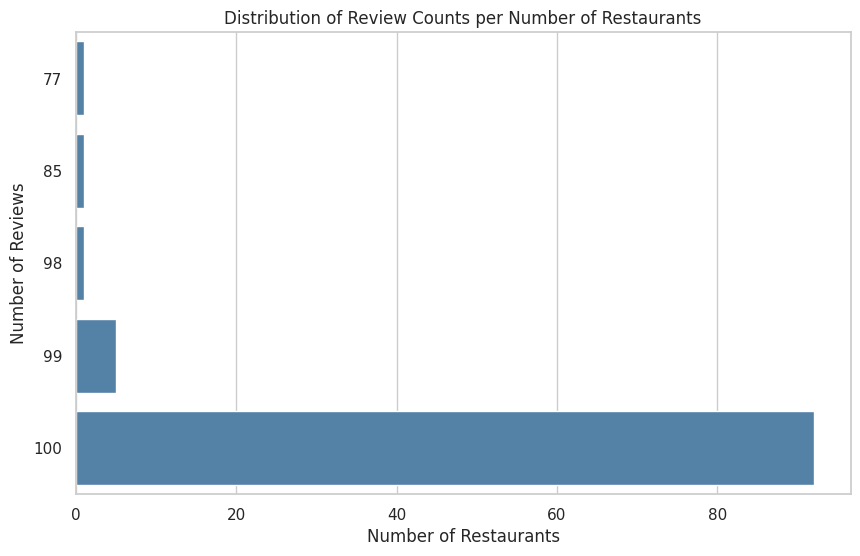

In [189]:
# Set seaborn style
sns.set(style="whitegrid")

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Restaurant'].value_counts(),color='steelblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Counts per Number of Restaurants')
plt.show()

As we saw when looking at the value counts, the vast majority of restaurants in our dataset have 100 reviews (92). The second most frequent number of reviews for restaurants in our dataset is 99 reviews, with 5 restaurants receiveing this many reviews. There is only a single restaurant which received reveiws in the following amounts (77, 85, 98).

---
<a id='section5.5'></a>

##### 5.5 Ratings by Most Influential Reviewers


Let's take a look at the distribution of Ratings offered by the Reviewers with the greatest followings.

In [190]:
sorted_df = df[['Reviewer', 'num_of_followers']].sort_values(by='num_of_followers', ascending=False)
top_followers = sorted_df.groupby('Reviewer').head(1)
top_followers = top_followers.head(5)
top_followers

Reviewer  num_of_followers
6592     5359             13410
8719     7317             13320
5160     2095             11329
8027     9235              9494
4650     0421              7628

In [191]:
print(f" There are {len(df[df['num_of_followers'] == 0 ])} Reviewers with 0 followers, this makes up {len(df[df['num_of_followers'] == 0 ])/len(df)*100} of our dataset.")

 There are 1574 Reviewers with 0 followers, this makes up 15.811150175791061 of our dataset.


Over 15% of our dataset is made up of Reviewers with 0 followers. Let's take a closer look at the ratings given by the more influential Reviewers and compare them with our "Non Influential" reviewers.
<a id='section5.5'></a>

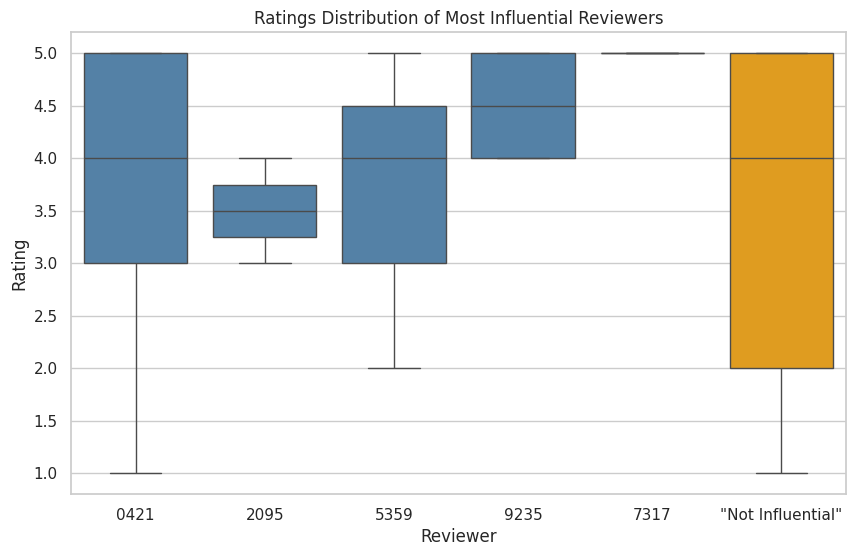

In [192]:
# Extract the Reviewers with the greatest number of reviews
followers_list = top_followers['Reviewer'].tolist()

# Filter the original DataFrame to include only the reviews from the top reviewers
top_follows = df[df['Reviewer'].isin(followers_list)].copy()  # Make a copy to avoid SettingWithCopyWarning

# Ensure the 'Rating' is a numeric column
top_follows['Rating'] = pd.to_numeric(top_follows['Rating'], errors='coerce')

# Filter the dataset to include only reviewers with 0 followers
reviewers_with_zero_followers = df[df['num_of_followers'] == 0].copy()  # Ensure to make a copy to avoid SettingWithCopyWarning
reviewers_with_zero_followers.loc[:, 'Reviewer'] = '"Not Influential"'  # Assign a common label for these reviewers using .loc

# Concatenate the two datasets together
combined_data = pd.concat([top_follows, reviewers_with_zero_followers])

# Create a color palette
colors = ['steelblue'] * (len(combined_data['Reviewer'].unique()) - 1) + ['orange']  # Last color for the 6th box

# Create a box plot for all ratings given by the top reviewers using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Reviewer', y='Rating', data=combined_data, palette=colors, hue='Reviewer', legend=False)
plt.title('Ratings Distribution of Most Influential Reviewers')
plt.xlabel('Reviewer')
plt.ylabel('Rating')
plt.show()

Looking at the plot above we can see that the interquartile range for reviewers with a large following is generally spread over a shorter range than the reviewers with 0 followers. This demonstrates a level of consistency amongst influential reviewers. While the spread for non-influential reviewers is greater than those considered to be 'influential', it is interesting to note that the Medians are pretty much the same across the board. Reviewer 7317 appears to be the most consitent reviewer but is likely only featured in the dataset a single time.

In [199]:
# Checking the number of reviews from our most consistent 'influential' reviewer.


print(f"As expected we only have a have a total of {len(df[df['Reviewer'] == '7317'])} reviews from the reviewer labelled 7317.")

As expected we only have a have a total of 1 reviews from the reviewer labelled 7317.


---
   <a id='section5.6'></a>

##### 5.6 Ratings by Most Prolific Reviewers
<a id='section5.6'></a>

What about the reviewers with the greatest number of reviews. Note that for this we are not using the information in the num_of_reviews column since this is not necessarily the number of reviews for any given reviewer in our dataset. We will be using value counts as number of reviews.

In [194]:
df['Reviewer'].value_counts().head(5)

3823    13
3433    13
1456    12
5630    11
8017    11
Name: Reviewer, dtype: int64

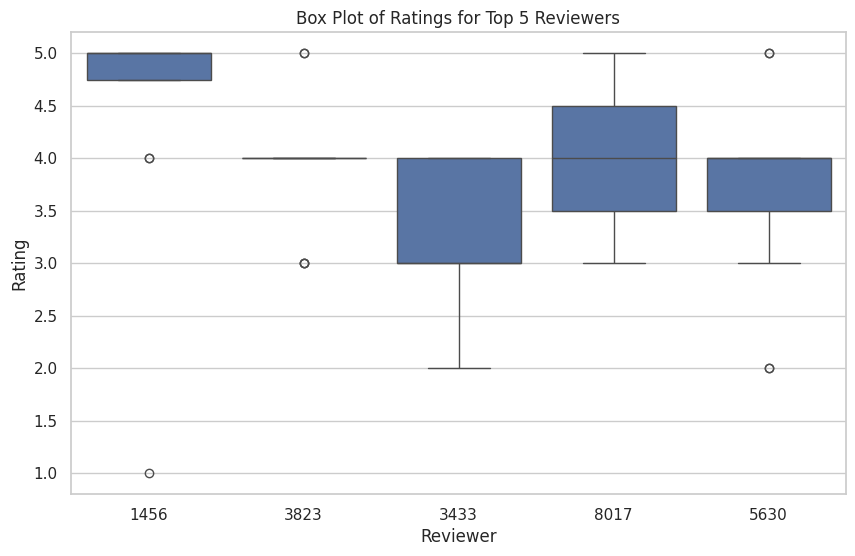

In [195]:
# Get the top 5 reviewers based on the number of reviews
top_reviewers = df['Reviewer'].value_counts().head(5).index

# Filter the original DataFrame to include only the reviews from the top reviewers
top_reviews = df[df['Reviewer'].isin(top_reviewers)].copy()

# Make sure 'Rating' is a numeric column
top_reviews['Rating'] = pd.to_numeric(top_reviews['Rating'], errors='coerce')

# Create a box plot for the ratings of the top 5 reviewers using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Reviewer', y='Rating', data=top_reviews)
plt.title('Box Plot of Ratings for Top 5 Reviewers')
plt.xlabel('Reviewer')
plt.ylabel('Rating')
plt.show()

The boxplot above shows the distribution of ratings offered by the reviewers with the most records in our dataset. The decision to exclude the 'non-influential' reviewers from this plot comes was made since the majority of data available is from reviewers with only a single review. Plotting the information from these reviewers would not shed much light on trends since the interquartile range would spread the full range of possible ratings.

From these results we could argue that reviewer 1456 is consistently generous with their ratings frequently offering 5s with a small portion of outlying reviews being awarded a 4. There are also a number of reviews recorded as outliers for this reviewer being awarded a rating of 1, this usually generous individual must have had a pretty rotten experience somewhere!

User 3823 is much more consitent with an interquartile range and median score of 4 with all outliers for ratings falling no further than one point above or below this score.

In [198]:
# A little examination into user 6408
# Calculate the first quartile (Q1)
Q1 = np.percentile(df[df['Reviewer'] == '3823']['Rating'], 25)

# Calculate the third quartile (Q3)
Q3 = np.percentile(df[df['Reviewer'] == '3823']['Rating'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("First Quartile (Q1) for reviewer 3823:", Q1)
print("Third Quartile (Q3) for reviewer 3823:", Q3)
print("Interquartile Range (IQR) for reviewer 3823:", IQR)

First Quartile (Q1) for reviewer 3823: 4.0
Third Quartile (Q3) for reviewer 3823: 4.0
Interquartile Range (IQR) for reviewer 3823: 0.0


---
<a id='section5.7'></a>


##### 5.7 Ratings by Time and Month
<a id='section5.7'></a>

Let's take a look at the relationship between time and rating.


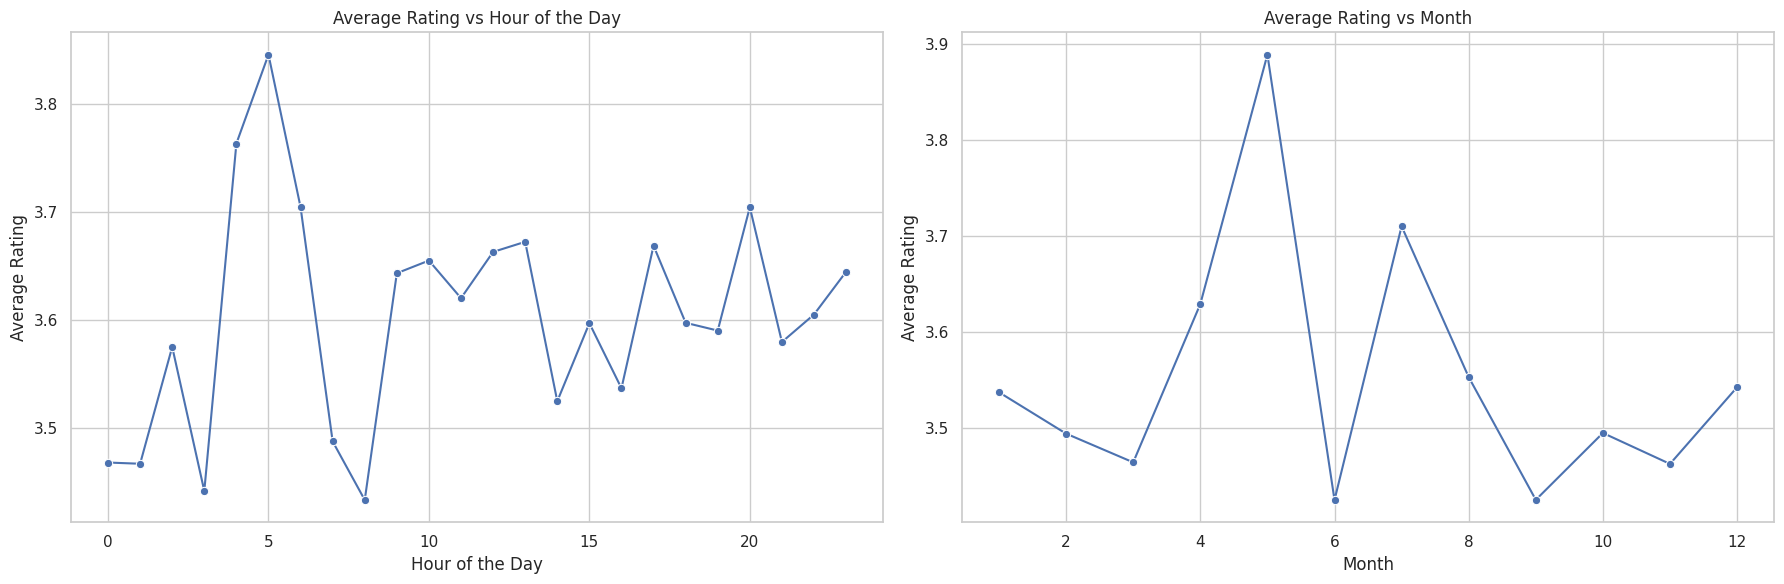

In [68]:
# Extract the hour and month information from the 'Time' column
df['Hour'] = df['Time'].dt.hour
df['Month'] = df['Time'].dt.month

# Calculate the average rating for each hour and month
average_ratings_hour = df.groupby('Hour')['Rating'].mean().reset_index().set_index('Rating')
average_ratings_month = df.groupby('Month')['Rating'].mean().reset_index().set_index('Rating')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot the line plot for average rating against Hour
sns.lineplot(x='Hour', y='Rating', data=average_ratings_hour, marker='o', ax=axes[0])
axes[0].set_title('Average Rating vs Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Rating')

# Plot the line plot for average rating against Month
sns.lineplot(x='Month', y='Rating', data=average_ratings_month, marker='o', ax=axes[1])
axes[1].set_title('Average Rating vs Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Rating')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In the plot above and to the left we can see a distinct spike in the average rating given in the early hours of the morning (4am-5am). This seems unusual and may indicate that the timezone in which the data was collected is not the same as the timezone used for converting the date information into datetime datatype.

Other than this initial spike there appears to be a very gentle upward trend in ratings throughout the day.

The plot above and to the right has two very distinct spikes in the Spring and Summer, with a heavy dip in ratings seen between these two peaks.

In [69]:
# Dropping the Hour and Month columns created for plotting.

cols = df[['Hour', 'Month']]
df.drop(cols, axis=1, inplace=True)

---
<a id='section5.8'></a>

##### 5.8 Ratings by Number of Pictures Included
<a id='section5.8'></a>

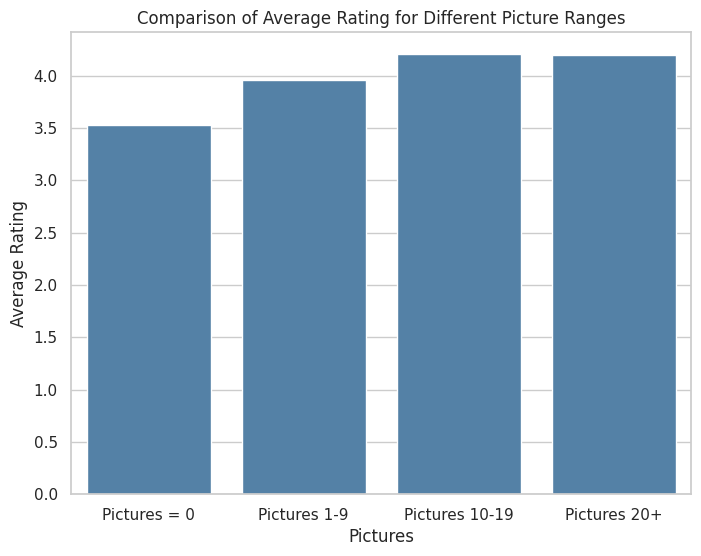

In [70]:
# Grouping by Pictures and ordering by Rating
average_rating_by_pictures = df.groupby('Pictures')['Rating'].mean().reset_index()

# Extract average rating for Pictures = 0
average_rating_pictures_0 = average_rating_by_pictures[average_rating_by_pictures['Pictures'] == 0]['Rating'].values[0]

# Extract average rating for Pictures between 1 and 9
average_rating_pictures_1_to_9 = average_rating_by_pictures[average_rating_by_pictures['Pictures'].between(1, 9)]['Rating'].mean()

# Extract average rating for Pictures between 10 and 19
average_rating_pictures_10_to_19 = average_rating_by_pictures[average_rating_by_pictures['Pictures'].between(10, 19)]['Rating'].mean()

# Extract average rating for Pictures 20+
average_rating_pictures_20 = average_rating_by_pictures[average_rating_by_pictures['Pictures'] > 19]['Rating'].values[0]


# Create a bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['Pictures = 0', 'Pictures 1-9', 'Pictures 10-19', 'Pictures 20+'],
            y=[average_rating_pictures_0, average_rating_pictures_1_to_9,
               average_rating_pictures_10_to_19, average_rating_pictures_20],
            color='steelblue')
plt.title('Comparison of Average Rating for Different Picture Ranges')
plt.xlabel('Pictures')
plt.ylabel('Average Rating')
plt.show()

Looking at the bar plot above it seems that there is a relationship between the score a review is given and the number of pictures attached to a review. This makes sense if we consider that a really impressive plate of food is more likely to be photographed and shared than an underwhelming one. The flipside of this of course is that if people are presented with hideous looking food they may want to do something similar, but let's not forget that the majority of our data is positive.

There does seem to be a point at which the number of photographs included in a review no longer helps to drive positive reviews, as seen in the bar representing reviews with more than 20 reviews.

---
<a id='section5.9'></a>

##### 5.9 Review Content Word Cloud
<a id='section5.9'></a>

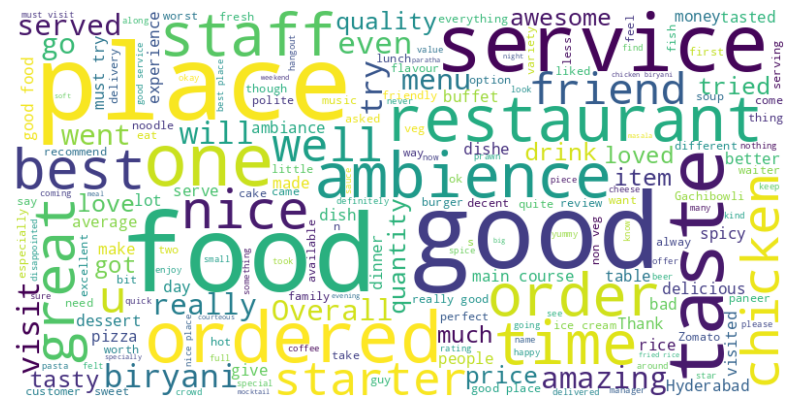

In [71]:
# Saving the Review content in a variable names 'text'
text = ' '.join(df['Review'].dropna())

# Create and generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In the word cloud above, some of the most frequently used words in our reviews are words like 'food', 'order' and 'restaurant' which makes sense considering this is a dataset of restaurant reviews. There are also words associated with characteristics of food and restaurant environments as well as staff. Most importantly there are words linked to time and speed of service which is a good sign for us!

EDA Key insights :-
   - The most influential reviewers tend to offer more consistent reviews than those with small followings.
   - There may be a statistically significant relationship between the number of pictures included and a rating score given.
   - If the time information is accurate, the most positive reviews are posted between 4am and 5am.

---
<a id='section6'></a>

## 6. Preprocessing Text Data

Now that we have an understanding of our data we can group our reviews into two categories to simplify the classification process. Any review with a score of 4 or above will be recorded as a 'positive' review (1), everything else will be recorded as a 'negative' review (0).

In [72]:
# Mapping the Rating scores to binary classes.

df['Rating'] = df['Rating'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})
df['Rating'].value_counts()


1    6316
0    3639
Name: Rating, dtype: int64

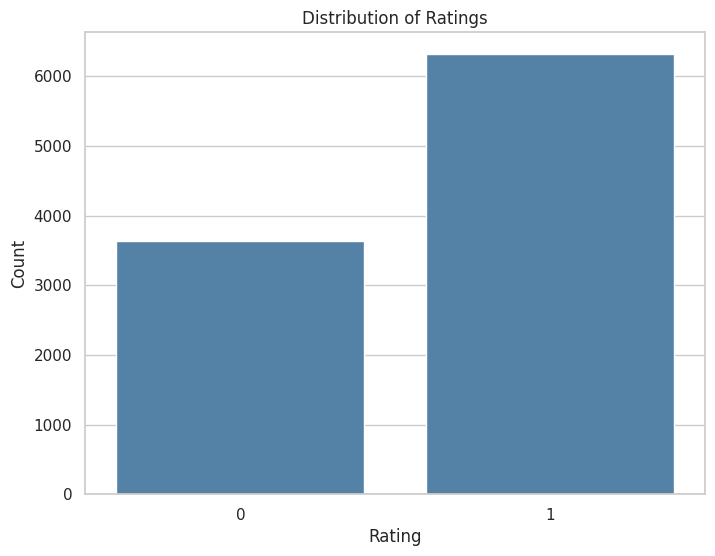

In [73]:
# Let's take a quick look at the distribution of our new classes.

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, color='steelblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Although the binarised data is easier to work with, we now have the problem of a fairly major class imbalance. This will negatively affect our model and the interpretation that follows. It would be a good idea to collect more data in order to correct this imbalance, similarly the number of instances of class 1 could be reduced although this will have it's own negative implications in terms of modeling.

For the purposes of this exercise we will continue with the slightly imbalanced data.


In [74]:
# Splitting the independent and dependent variables

X = df.drop(columns='Rating')
y = df['Rating']

In [75]:
# split X and y into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [76]:
# check shapes of train and test sets

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7466, 7) (2489, 7) (7466,) (2489,)


In [77]:
# tokenizer function
stemmer = PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    '''
    Takes a sentence:
    - Removes the punctuation
    - Separates and Removes Stop Words
    - Stems the remaining tokens

    Returns list of stemmed tokens
    '''
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word != ''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [78]:
# Instantiate, fit, transform positive vectorizer
vec = CountVectorizer(tokenizer=my_tokenizer, min_df=5, max_features=750) # Only include words that have appeared in at least 5 reviews, no more than 750 total features
train = vec.fit(X_train['Review'])
train_trans = vec.transform(X_train['Review'])
test_trans = vec.transform(X_test['Review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [79]:
# size of both sparse matrices
print(train_trans.shape, test_trans.shape)

(7466, 750) (2489, 750)


In [80]:
# Bag of Words Train and Test with feature names
train_df = pd.DataFrame(train_trans.toarray(), columns=vec.get_feature_names_out())
test_df = pd.DataFrame(test_trans.toarray(), columns=vec.get_feature_names_out())

In [81]:
# train head
train_df.head()

1  10  15  2  20  3  30  35  4  45  ...  write  wrong  ye  year  yesterday  \
0  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
1  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
2  0   0   0  1   0  0   0   0  0   0  ...      0      0   0     0          0   
3  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
4  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   

   yet  your  yum  yummi  zomato  
0    0     0    0      0       0  
1    0     0    0      0       0  
2    0     0    0      0       0  
3    0     0    0      0       0  
4    0     0    0      0       0  

[5 rows x 750 columns]

In [82]:
# test head
test_df.head()

1  10  15  2  20  3  30  35  4  45  ...  write  wrong  ye  year  yesterday  \
0  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
1  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
2  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
3  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   
4  0   0   0  0   0  0   0   0  0   0  ...      0      0   0     0          0   

   yet  your  yum  yummi  zomato  
0    0     0    0      0       0  
1    0     0    0      0       0  
2    0     0    0      0       0  
3    0     0    0      0       0  
4    0     0    0      0       1  

[5 rows x 750 columns]

In [83]:
# concat the two vectorized dataframes back into their original dataframes
X_train = pd.concat([X_train.reset_index(drop=True), train_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), test_df.reset_index(drop=True)], axis=1)

# drop positive and negative review columns
X_train.drop(columns=['Restaurant','Reviewer','Time','Review'], inplace=True)
X_test.drop(columns=['Restaurant','Reviewer','Time','Review'], inplace=True)

---
<a id='section7'></a>

## 7. Modelling and Insights

In [84]:
# Instantiate and fit logistic regression
logreg = LogisticRegression(max_iter=10000, solver='lbfgs')
logreg.fit(X_train, y_train)

# train and test scores
print(f'Train score: {logreg.score(X_train, y_train)}')
print(f'Test score: {logreg.score(X_test, y_test)}')

Train score: 0.8959282078757032
Test score: 0.8453194053836882


We can see that our model can predict whether a review is likely to be positive or negative with 84.5% accuracy.

In [85]:
# put model coefficients in a dataframe
coef_df = pd.DataFrame({'feature':X_train.columns, 'coef':logreg.coef_[0]})
coef_df.sample(10)

feature      coef
741        wow -0.309232
52   atmospher  0.026926
702    varieti  0.409757
104       cake  0.220793
623      sport -0.309299
93    broccoli -0.079738
482     pathet -2.720497
209     enough  0.511904
486      peopl -0.352081
90       bread -0.313686

In [86]:
# extract top 20 positive and negative coefficients
top_40_pos = coef_df.sort_values(by='coef', ascending=False).head(40)
top_40_neg = coef_df.sort_values(by='coef', ascending=True).head(40)

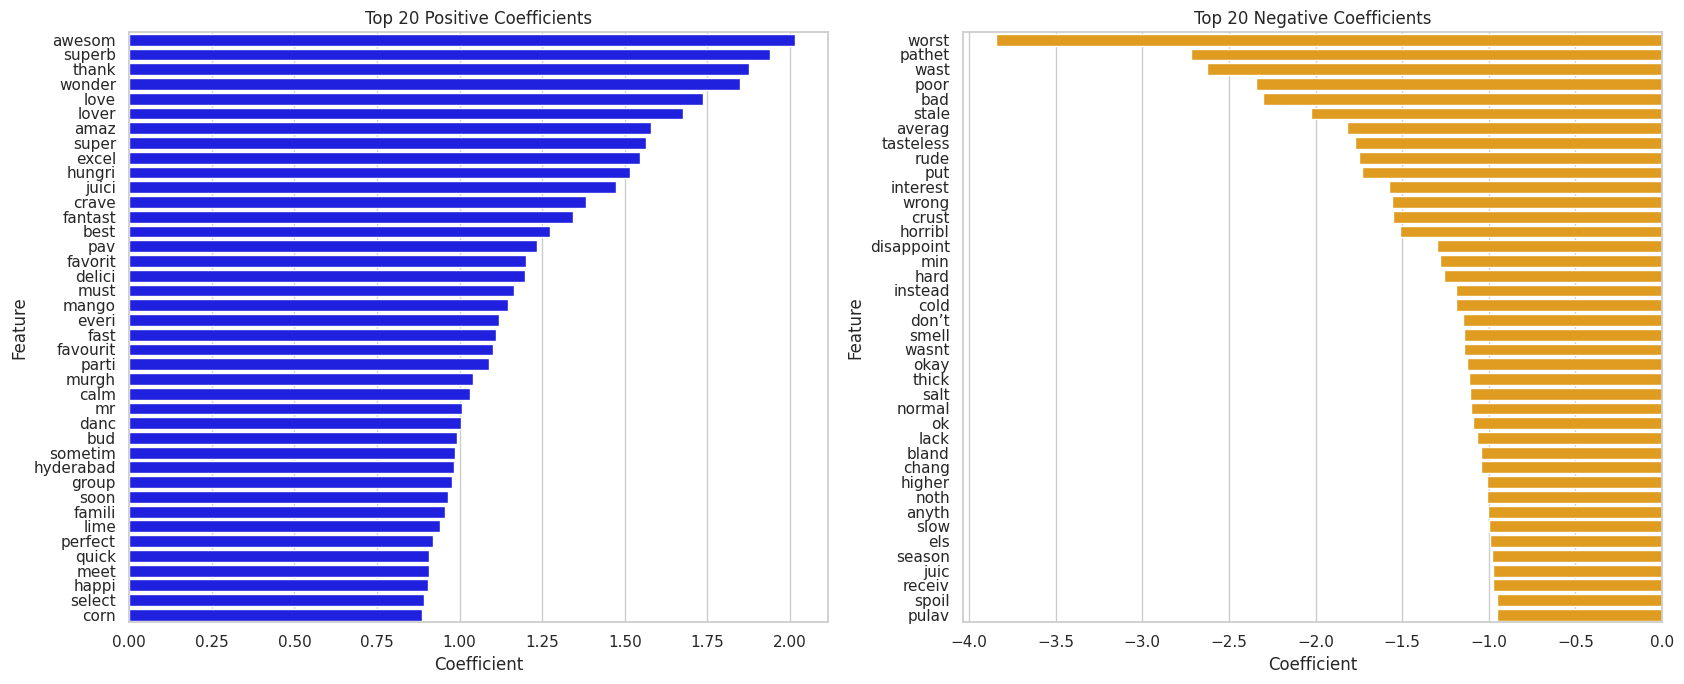

In [87]:
# create 2 subplots
fig, ax = plt.subplots(1,2, figsize=(17,7))

# plot top 20 positive coefficients
sns.barplot(x='coef', y='feature', data=top_40_pos, ax=ax[0], color='blue')
ax[0].set_title('Top 20 Positive Coefficients')
ax[0].set_xlabel('Coefficient')
ax[0].set_ylabel('Feature')

# plot top 20 negative coefficients
sns.barplot(x='coef', y='feature', data=top_40_neg, ax=ax[1], color='orange')
ax[1].set_title('Top 20 Negative Coefficients')
ax[1].set_xlabel('Coefficient')
ax[1].set_ylabel('Feature')

# show plots
plt.tight_layout()
plt.show()

The plot on the left shows features that are associated with the greatest level of predictive power for positive reviews. Looking towards the bottom half of the plot there are two features that help verify our hypothesis. The words 'fast' and 'quick' have a positive coefficient of ~1.1 - ~0.9 indicating that these two words have an effect on the prediction of a positive review.

The plot on the right shows features that are associated with the greatest level of predictive power for positive reviews. With a correlation coefficient of around -1.0 the feature "slow" has similar predictive power to the previous two words although this coefficient is affiliated with producing negative reviews.

These three features (or words) are evidence that back up the assumption that wait time can be a determining factor for producing both negative and positive restaurant reviews. This would suggest that if restaurant wait time can be decreased for customers then positive reviews may increase and we may also see a decrease in negative reviews with all round improved guest experience.

In [88]:
# put coefficients in a dataframe
coef_df = pd.DataFrame({'feature':X_train.columns, 'coef':logreg.coef_[0], 'odds_ratios':np.exp(logreg.coef_[0])})
coef_df.sample(5)

feature      coef  odds_ratios
195   donut -0.096158     0.908320
450   offic  0.505782     1.658281
368   liter  0.163380     1.177484
417    momo -0.040911     0.959915
60   awesom  2.014627     7.497928

In [89]:
# Features associated with fast service

coef_df[(coef_df['feature'] == 'fast') | (coef_df['feature'] == 'quick')]

feature      coef  odds_ratios
231    fast  1.109732     3.033547
530   quick  0.906177     2.474844

In [90]:
# Features associated with slow service

coef_df[(coef_df['feature'] == 'slow') | (coef_df['feature'] == 'late')]

feature     coef  odds_ratios
353    late -0.78183     0.457568
603    slow -1.00068     0.367629

Interpreting the Odds Ratios for our features of interest here, are as follows:
  - Positive Features
  - With a 1 unit increase in 'fast', the odds of a review being classified as positive increase by a factor of 3.03
  - With a 1 unit increase in 'quick', the odds of a review being classified as positive increase by a factor of 2.47
  - Negative Features
  - With a 1 unit increase in 'late', the odds of a review being classified as positive decrease by a factor of 0.46
  - With a 1 unit increase in 'slow', the odds of a review being classified as positive decrease by a factor of 0.37

---
<a id='section8'></a>

## 8. Image Data EDA

In [91]:
train = {}
test = {}

# creating a variable with the pathway to the image data
path = "/content/drive/MyDrive/Job Applications/input/food11-image-dataset/"

# Using a dictionary to store images for each category under the training data.
path_train = os.path.join(path, "training")
for i in os.listdir(path_train):
    train[i] = os.listdir(os.path.join(path_train, i))

# Using a dictionary to store images for each category under the test data.
path_test = os.path.join(path, "validation")
for i in os.listdir(path_test):
    test[i] = os.listdir(os.path.join(path_test, i))

In [92]:
# Taking a look at the number of images in the training and test folders

len_train = np.concatenate(list(train.values())).shape[0]
len_test = np.concatenate(list(test.values())).shape[0]

print("Number of images in training data : {}".format(len_train))
print("Number of images in testing data : {}".format(len_test))

Number of images in training data : 9876
Number of images in testing data : 3440


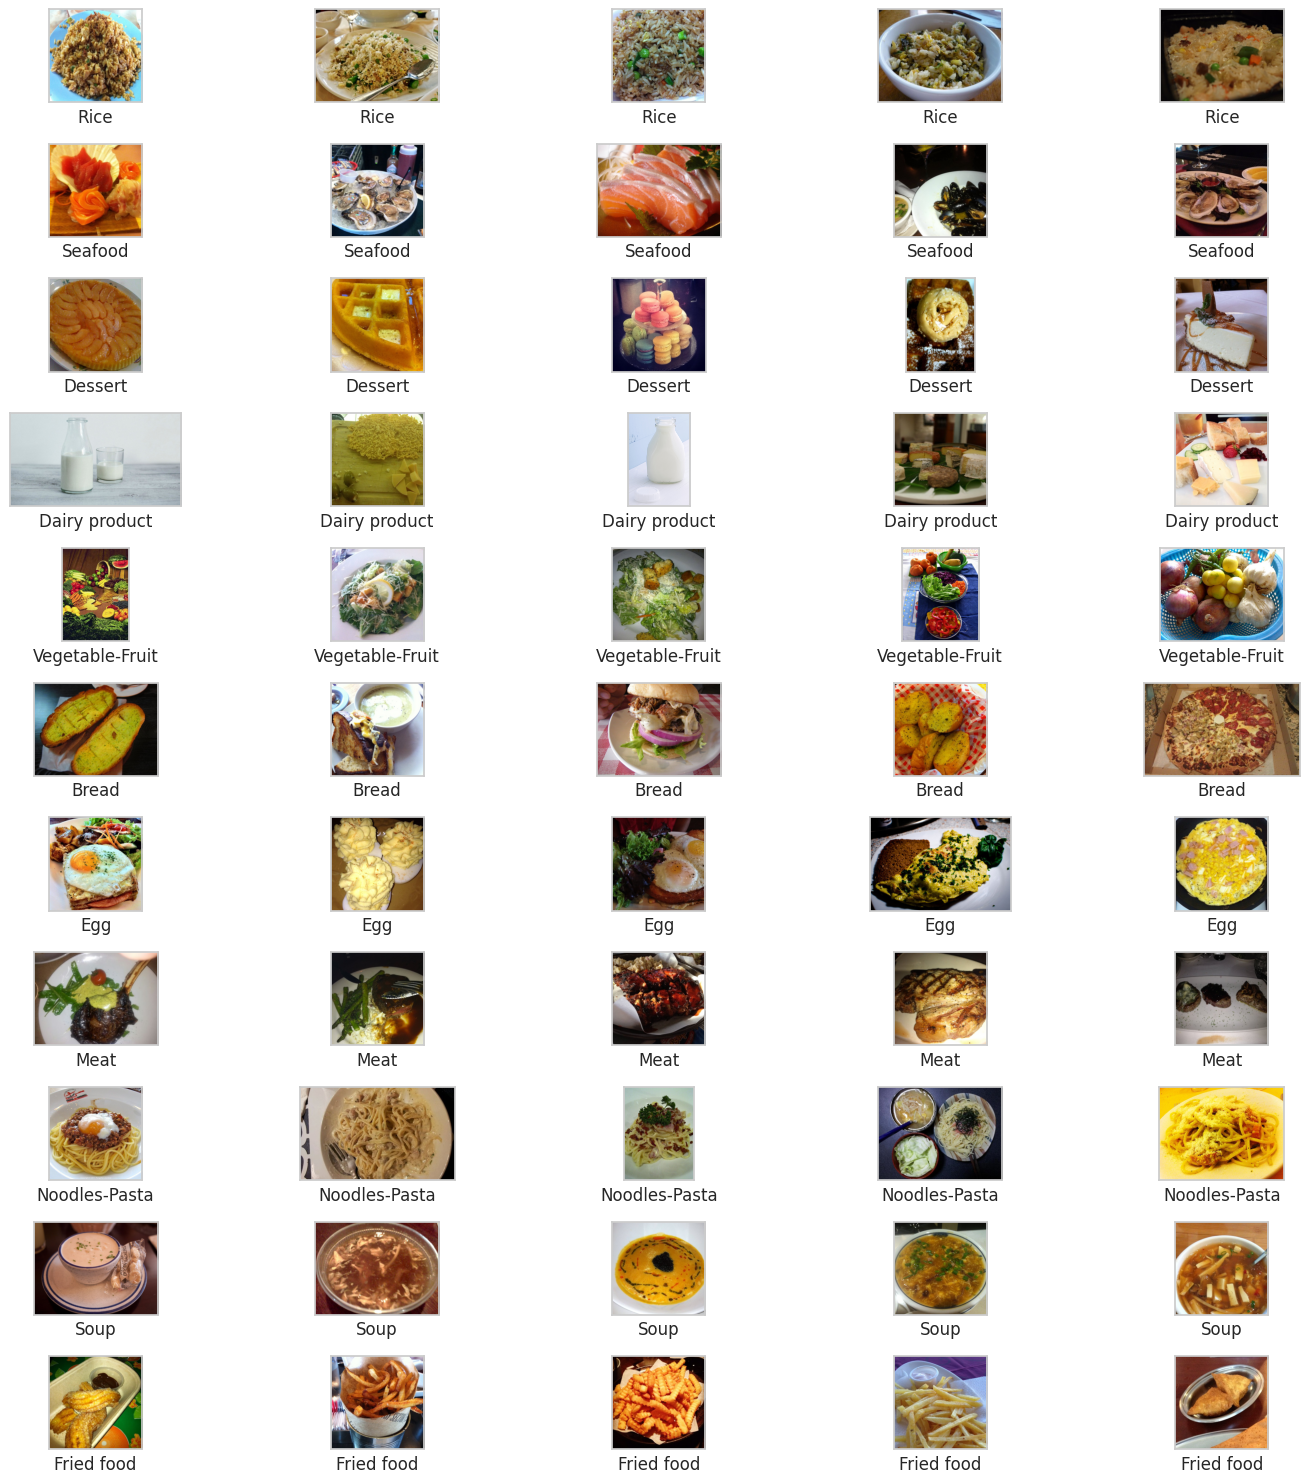

In [93]:
# # Display 5 images at random for each of the 11 categories from training data.

fig, axs = plt.subplots(len(train.keys()), 5, figsize=(15, 15))

for i, item in enumerate(os.listdir(path_train)):
    images = sample(train[item], 5)

    for j, image in enumerate(images):
        img = Image.open(os.path.join(path_train, item, image))
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=item, xticks=[], yticks=[])

fig.tight_layout()

In [94]:
# Let's take a look at how many items from each food group we have in our training data.

for item in train.keys():
    print(item, len(train[item]))

Rice 280
Seafood 855
Dessert 1500
Dairy product 429
Vegetable-Fruit 709
Bread 994
Egg 986
Meat 1325
Noodles-Pasta 450
Soup 1500
Fried food 848


Looks like the dataset is a little soup and dessert heavy!

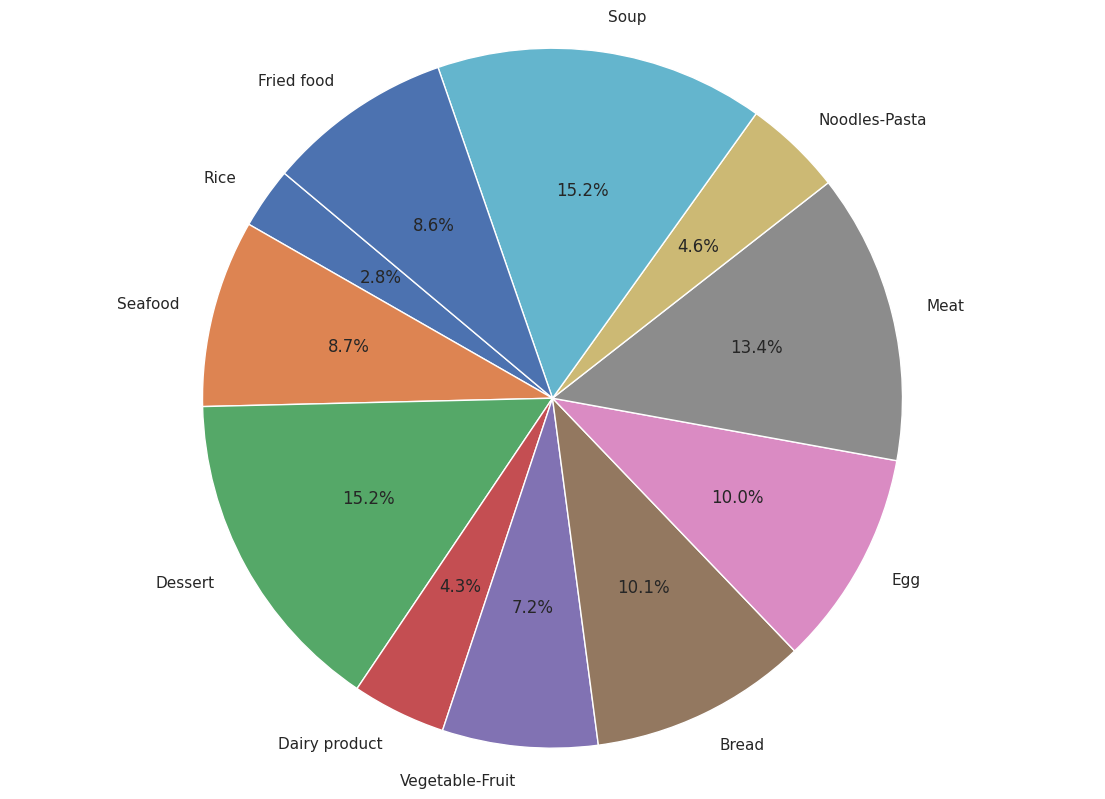

In [95]:
# Make a pie-chart to visualize the percentage contribution of each category.

labels = list(train.keys())
sizes = [len(train[item]) for item in train]

# Create a pie chart

plt.figure(figsize=(14, 10))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.show()

In [96]:
# Creating an Image Generator augmentation. We'll make use of zooming, flipping (horizontally and vertically), and rescaling.

train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale=1./255
)

# For test data we only rescale and NEVER augment.

test_datagen = ImageDataGenerator(rescale=1./255)

In [97]:
# Instantiating generators to make images (including augmented ones) flow from the directory to the model.
# Train generator

train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Test generator

test_generator = test_datagen.flow_from_directory(
    path_test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 9876 images belonging to 11 classes.
Found 3440 images belonging to 11 classes.


---
<a id='section9'></a>


## 9. Building and Optimizing Models

In [98]:
# Load the inception resnetv2 model

basemodel = InceptionResNetV2(
    weights = "imagenet",
    include_top = False, # Classification layer (output layer- sigmoid activations)
    input_tensor = Input((256, 256, 3))
)

219055592/219055592 [==============================] - 10s 0us/step


In [99]:
# Print the model summary

basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_norm

In [100]:
# We will freeze the basemodel weights, so these weights won't change during training

basemodel.trainable = False

In [101]:
# Add head for classification to the model

headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = "Global_Average_Pool")(headmodel)
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(256, activation = "relu", name = "dense_1")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = "dense_2")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(11, activation = "softmax", name = "output")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [102]:
# Compiling model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = SGD(
        learning_rate = 0.01,
        momentum = 0.9
    ),
    metrics = ["accuracy"]
)# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    patience = 20
)

# save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights.hdf5",
    verbose = 1,
    save_best_only = True
)

In [103]:
# Finally, fit the model to the data.

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // 32,
    epochs = 1,
    callbacks = [checkpointer, earlystopping]
)

308/308 [==============================] - ETA: 0s - loss: 1.1573 - accuracy: 0.6225 

308/308 [==============================] - 5403s 17s/step - loss: 1.1573 - accuracy: 0.6225


In [104]:
# Now that's finished, let's save the model in case anything goes wrong

model.save('/content/drive/MyDrive/base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [105]:
# Checking that we can load the saved model without issue

loaded_model = load_model('/content/drive/MyDrive/base_model.h5')

In [106]:
# Unfreeze the weights in the base model, now these weights will be changed during training and fine tuning

loaded_model.trainable = True

In [107]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)

earlystopping = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    patience = 20
)

# Save the best model with lower loss

checkpointer = ModelCheckpoint(
    filepath = "weights_fine.hdf5",
    verbose = 1,
    save_best_only = True
)

In [108]:
# fine tune the model with very low learning rate

history = loaded_model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // 32,
    epochs = 5,
    callbacks = [checkpointer, earlystopping]
)

Epoch 1/5
308/308 [==============================] - ETA: 0s - loss: 0.8653 - accuracy: 0.7225

308/308 [==============================] - 229s 720ms/step - loss: 0.8653 - accuracy: 0.7225
Epoch 2/5
308/308 [==============================] - ETA: 0s - loss: 0.7654 - accuracy: 0.7542

308/308 [==============================] - 225s 728ms/step - loss: 0.7654 - accuracy: 0.7542
Epoch 3/5
308/308 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.7697

308/308 [==============================] - 223s 725ms/step - loss: 0.7258 - accuracy: 0.7697
Epoch 4/5
308/308 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.7819

308/308 [==============================] - 220s 715ms/step - loss: 0.6883 - accuracy: 0.7819
Epoch 5/5
308/308 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.7876

308/308 [==============================] - 232s 754ms/step - loss: 0.6580 - accuracy: 0.7876


It looks like the model may not be converging and our earlystopping is not being called into action.

In [109]:
# Once again, just to be safe we can save our fine-tuned model to a file

loaded_model.save('/content/drive/MyDrive/final_model.h5')

In [110]:
# Evaluate the performance of the model on test data

evaluate = loaded_model.evaluate_generator(
    test_generator,
    steps = test_generator.n // 32,
    verbose = 1
)

print('Accuracy Test : {}'.format(evaluate[1]))

<ipython-input-110-1d46a6cf76fd>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = loaded_model.evaluate_generator(


107/107 [==============================] - 2106s 20s/step - loss: 0.5663 - accuracy: 0.8248
Accuracy Test : 0.8247663378715515


We have increased the accuracy of our model by over 20% through fine tuning.

In [111]:
# Assigning label names to the corresponding indexes

labels = {
    0: 'Bread',
    1: 'Dairy product',
    2: 'Dessert',
    3: 'Egg',
    4: 'Fried food',
    5: 'Meat',
    6: 'Noodles-Pasta',
    7: 'Rice',
    8: 'Seafood',
    9: 'Soup',
    10: 'Vegetable-Fruit'
}

In [114]:
# Loading images and their predictions

prediction = []
original = []
image = []
count = 0
path_eval = "/content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation"
for i in os.listdir(path_eval):
    for item in os.listdir(os.path.join(path_eval, i)):
        #code to open the image
        img= PIL.Image.open(os.path.join(path_eval, i, item))
        #resizing the image to (256,256)
        img = img.resize((256,256))
        #appending image to the image list
        image.append(img)
        #converting image to array
        img = np.asarray(img, dtype= np.float32)
        #normalizing the image
        img = img / 255
        #reshaping the image in to a 4D array
        img = img.reshape(-1,256,256,3)
        #making prediction of the model
        predict = loaded_model.predict(img)
        #getting the index corresponding to the highest value in the prediction
        predict = np.argmax(predict)
        #appending the predicted class to the list
        prediction.append(labels[predict])
        #appending original class to the list
        original.append(i)

1/1 [==============================] - 0s 68ms/step


In [117]:
# Visualizing the results with 20 randomly selected images from the evaluation folder

fig=plt.figure(figsize = (100,100))
for i in range(10):
    j = random.randint(0,len(image))
    fig.add_subplot(10,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

The output of the cell above is visible in google colab.

In [118]:
# Check out the Classification Report

print(classification_report(np.asarray(prediction), np.asarray(original)))

                 precision    recall  f1-score   support

          Bread       0.71      0.88      0.79       300
  Dairy product       0.70      0.83      0.76       124
        Dessert       0.72      0.87      0.79       418
            Egg       0.88      0.59      0.70       501
     Fried food       0.83      0.78      0.80       302
           Meat       0.88      0.82      0.85       462
  Noodles-Pasta       0.99      0.95      0.97       153
           Rice       1.00      0.86      0.92       112
        Seafood       0.77      0.94      0.84       249
           Soup       0.95      0.98      0.96       487
Vegetable-Fruit       0.95      0.92      0.93       239

       accuracy                           0.84      3347
      macro avg       0.85      0.85      0.85      3347
   weighted avg       0.85      0.84      0.84      3347



Looking at the Classification Report above:

Overall Accuracy:

- The model achieves an accuracy of 84%, indicating that 84% of the images in the dataset are correctly classified.

Class-specific Performance:

- The model performs well across most classes, with precision, recall, and F1-score generally above 0.7 for each class.
Some classes like "Noodles-Pasta," "Rice," and "Soup" exhibit exceptionally high performance, with F1-scores of 0.97, 0.92, and 0.96 respectively.

Balanced Metrics:

- The macro average and weighted average metrics show balanced performance across classes, suggesting that the model's performance is consistent across different categories and is not heavily influenced by class imbalance.

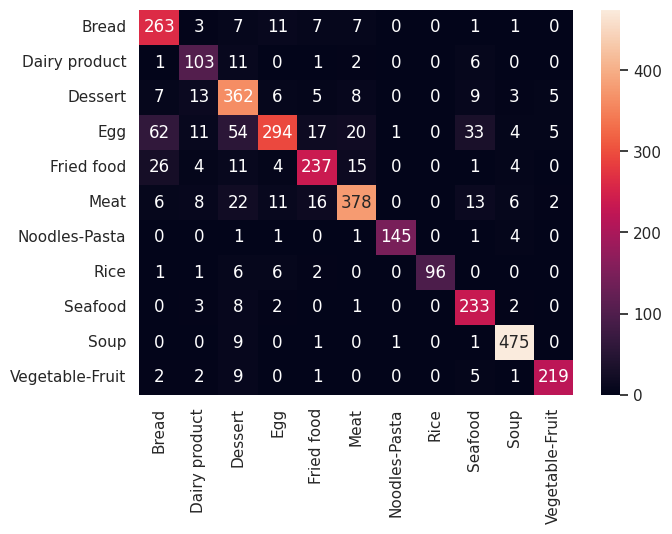

In [119]:
# View the 11x11 confusion matrix

plt.figure(figsize = (7, 5))
cm = confusion_matrix(np.asarray(prediction), np.asarray(original))
sns.heatmap(
    cm,
    annot = True,
    fmt = "d",
    xticklabels=[labels[i] for i in range(len(labels))],
    yticklabels=[labels[i] for i in range(len(labels))])
plt.show()

---
<a id='section10'></a>

## 10. Building an Automated Expeditor

Now that the model works, let's think about how we can turn this into a working Expo tool. Maybe a function that randomly selects images from the test folder and adds those as values to a dictionary, the key to which will be a bill/table number. Use wait to mimic the dishes appearing at different times as they would in the restaurant. Send a signal when a bill is completed.

Let's start by writing some functions for our automation process.

In [122]:
def select_random_files_dicts(root_folder):
    evaluation_folder = os.path.join(root_folder, 'Job Applications/input/food11-image-dataset/evaluation')
    folders = os.listdir(evaluation_folder)

    num_dicts = random.randint(1, 4)
    random_files_dicts = {}

    for _ in range(num_dicts):
        selected_files_dict = {}
        num_files = random.randint(2, 4)  # Random number of seats between 1 and 16
        for seat_number in range(1, num_files + 1):  # Iterating from 1 to num_files
            random_folder = random.choice(folders)
            folder_path = os.path.join(evaluation_folder, random_folder)

            files = os.listdir(folder_path)
            random_file = random.choice(files)
            file_path = os.path.join(folder_path, random_file)

            selected_files_dict[f'Seat {seat_number}'] = file_path
        random_files_dicts[f'Table_{_+1}'] = selected_files_dict

    return random_files_dicts

# Usage
root_folder = '/content/drive/MyDrive' # <--- this should be pointing to the evaluation folder?
random_files_dicts = select_random_files_dicts(root_folder)

print("Randomly selected dictionaries with file paths:")
for dict_name, files_dict in random_files_dicts.items():
    print(f"{dict_name}:")
    for table_number, file_path in files_dict.items():
        print(f"\t{table_number}: {file_path}")

Randomly selected dictionaries with file paths:
Table_1:
	Seat 1: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Soup/301.jpg
	Seat 2: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Egg/258.jpg
	Seat 3: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Meat/101.jpg
	Seat 4: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Egg/151.jpg
Table_2:
	Seat 1: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Noodles-Pasta/133.jpg
	Seat 2: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Soup/196.jpg
Table_3:
	Seat 1: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Meat/0.jpg
	Seat 2: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Rice/70.jpg
	Seat 3: /content/drive/MyDrive/Job Applications/input/food11-image-dataset/evaluation/Dairy product/28.jpg
Table_4:
	Sea

1/1 [==============================] - 0s 40ms/step


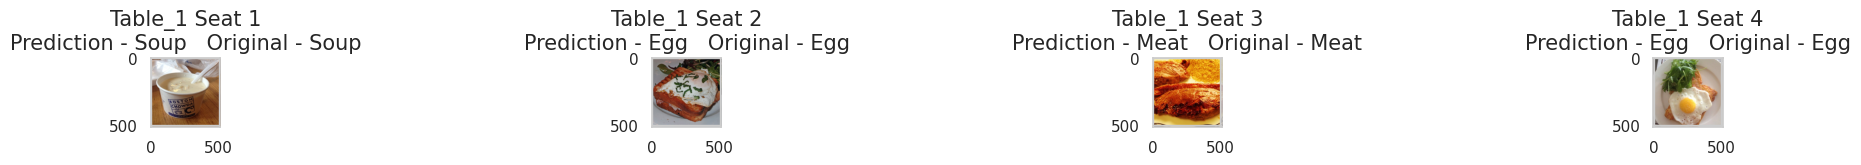

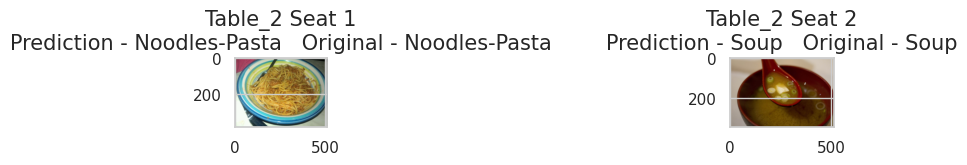

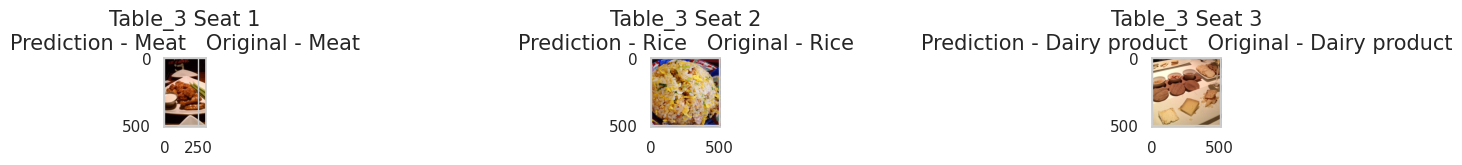

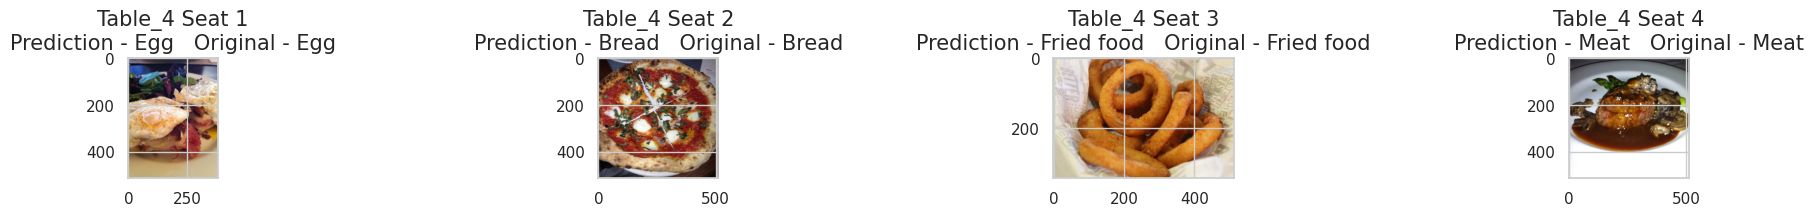

In [123]:
# Define the labels for the classes
labels = {
    0: 'Bread',
    1: 'Dairy product',
    2: 'Dessert',
    3: 'Egg',
    4: 'Fried food',
    5: 'Meat',
    6: 'Noodles-Pasta',
    7: 'Rice',
    8: 'Seafood',
    9: 'Soup',
    10: 'Vegetable-Fruit'
}

# Define the function to process images
def process_image(random_file_path, loaded_model):
    # Code to open the image
    img = PIL.Image.open(random_file_path)
    # Resizing the image to (256, 256)
    img = img.resize((256, 256))
    # Converting image to array
    img_array = np.asarray(img, dtype=np.float32)
    # Normalizing the image
    img_array = img_array / 255
    # Reshaping the image into a 4D array
    img_array = img_array.reshape(-1, 256, 256, 3)
    # Making prediction of the model
    predict = loaded_model.predict(img_array)
    # Getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    # Returning the predicted class
    return labels[predict]

# Load your neural network model
loaded_model = load_model('/content/drive/MyDrive/final_model.h5')

# Define the function to select a random file path and make predictions
def select_and_predict_random_file(random_files_dicts):
    predictions = []
    original_classes = []
    images = []
    table_seat_info = []

    for table, seats in random_files_dicts.items():
        for seat, file_path in seats.items():
            prediction = process_image(file_path, loaded_model)
            predictions.append(prediction)
            original_classes.append(os.path.basename(os.path.dirname(file_path)))  # Get the directory name as the class
            # Open the image and append to the images list
            img = PIL.Image.open(file_path)
            images.append(img)
            table_seat_info.append((table, seat))  # Store table and seat information

    return images, predictions, original_classes, table_seat_info

# Usage
images, predictions, original_classes, table_seat_info = select_and_predict_random_file(random_files_dicts)

fig = None
current_table = None
num_columns = 0
max_columns = 4  # Set the maximum number of columns per row
vertical_spacing = 1.2  # Set the desired vertical spacing between subplots

for i in range(len(images)):
    if table_seat_info[i][0] != current_table:
        current_table = table_seat_info[i][0]
        num_columns = 0
        if fig:
            plt.subplots_adjust(wspace=0.4, hspace=vertical_spacing, top=0.9)  # Adjust the space between subplots and increase the top margin
        fig = plt.figure(figsize=(24, 24))

    num_columns += 1
    ax = fig.add_subplot(len(images), max_columns, num_columns)
    ax.set_title(f"{table_seat_info[i][0]} {table_seat_info[i][1]}\nPrediction - {predictions[i]}   Original - {original_classes[i]}", fontsize=15)  # Set title
    plt.imshow(images[i])

plt.show()

# **SERVICE!!!**

### What's Next?

  - Let's try and make use of computer vision to make realtime classifications using live camera feed.